In [ ]:
from bs4 import BeautifulSoup
import urllib
import json
import os
import re
import requests
import pandas as pd
import re
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

response = requests.get('https://www.thegoodtee.com/collections/all', headers=headers).text

soup = BeautifulSoup(response, 'html.parser')

## Mens

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

response = requests.get('https://www.thegoodtee.com/collections/men', headers=headers).text

soup = BeautifulSoup(response, 'html.parser')

In [ ]:
soup

<!DOCTYPE doctype html>

<html class="no-js" lang="en">
<head>
<script>
window.KiwiSizing = window.KiwiSizing === undefined ? {} : window.KiwiSizing;
KiwiSizing.shop = "thegoodtee786.myshopify.com";


</script>
<meta content="pbwjzgl82l0vdumdts8c3w3kbpmecf" name="facebook-domain-verification"/>
<!-- Hotjar Tracking Code for https://www.thegoodtee.com/ -->
<script>
    (function(h,o,t,j,a,r){
        h.hj=h.hj||function(){(h.hj.q=h.hj.q||[]).push(arguments)};
        h._hjSettings={hjid:2295537,hjsv:6};
        a=o.getElementsByTagName('head')[0];
        r=o.createElement('script');r.async=1;
        r.src=t+h._hjSettings.hjid+j+h._hjSettings.hjsv;
        a.appendChild(r);
    })(window,document,'https://static.hotjar.com/c/hotjar-','.js?sv=');
</script>
<!-- End of Hotjar Tracking Code for www.thegoodtee.com -->
<meta content="PalRfJD-TmIJak3xqYtqBwxqVCyDkTFR6m_kEx64C4A" name="google-site-verification"/>
<script type="text/javascript">var _0x2192=['origin','utm_source=shopsheriff&utm

In [ ]:
script = soup.findAll('script', type='application/ld+json')[3]

In [ ]:
# script = script.replace('\n' , '')

In [ ]:
script

<script type="application/ld+json">
    [
        {
            "@context" : "http://schema.org",
            "@type": "CollectionPage",
            "name": "Men's Organic Fair Trade Cotton T-Shirts",
            "url": "https://www.thegoodtee.com/collections/men",
            "description": "",
            "image": "https://cdn.shopify.com/s/files/1/0039/6915/5121/collections/MG_7544_copy.jpg?v=1615828566"
        },





        {
            "@context" : "http://schema.org",
            "@type" : "Product",
            "gtin12": "759687871990",
            "productId": "759687871990",
            "url" : "https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex",
            "name" : "The Fave &amp; Fair  Unisex Tee",
            "description" : "Our gender-neutral short sleeve t-shirt, a tried-and-true classic, is softer than a baby&#39;s you-know-what. It has the modern fit of a well-loved favorite. And the bonus? It’s sustainable, so you can do your part for the p

In [ ]:
script = str(script).replace('<script type="application/ld+json">', '')

In [ ]:
script = script.replace('\n' , '')

In [ ]:
script = script.replace(',]</script>', ']')

In [ ]:
script

'    [        {            "@context" : "http://schema.org",            "@type": "CollectionPage",            "name": "Men\'s Organic Fair Trade Cotton T-Shirts",            "url": "https://www.thegoodtee.com/collections/men",            "description": "",            "image": "https://cdn.shopify.com/s/files/1/0039/6915/5121/collections/MG_7544_copy.jpg?v=1615828566"        },        {            "@context" : "http://schema.org",            "@type" : "Product",            "gtin12": "759687871990",            "productId": "759687871990",            "url" : "https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex",            "name" : "The Fave &amp; Fair  Unisex Tee",            "description" : "Our gender-neutral short sleeve t-shirt, a tried-and-true classic, is softer than a baby&#39;s you-know-what. It has the modern fit of a well-loved favorite. And the bonus? It’s sustainable, so you can do your part for the planet while chilling in your new favorite go-to tee. Ma

In [ ]:
script2 = json.loads(script)

In [ ]:
script2

[{'@context': 'http://schema.org',
  '@type': 'CollectionPage',
  'description': '',
  'image': 'https://cdn.shopify.com/s/files/1/0039/6915/5121/collections/MG_7544_copy.jpg?v=1615828566',
  'name': "Men's Organic Fair Trade Cotton T-Shirts",
  'url': 'https://www.thegoodtee.com/collections/men'},
 {'@context': 'http://schema.org',
  '@type': 'Product',
  'aggregateRating': {'@type': 'AggregateRating',
   'description': 'Judge.me Reviews',
   'ratingValue': '5.00',
   'reviewCount': '8'},
  'brand': {'name': 'The Good Tee'},
  'description': 'Our gender-neutral short sleeve t-shirt, a tried-and-true classic, is softer than a baby&#39;s you-know-what. It has the modern fit of a well-loved favorite. And the bonus? It’s sustainable, so you can do your part for the planet while chilling in your new favorite go-to tee. Make Mother Nature Proud with this versatile staple that will serve you well for years to come.\xa0Unisex modern fitFairtrade certified organic cotton &amp; eco-friendly dye

In [ ]:
script2 = script2[1:]

In [ ]:
script2[2]

{'@context': 'http://schema.org',
 '@type': 'Product',
 'aggregateRating': {'@type': 'AggregateRating',
  'description': 'Judge.me Reviews',
  'ratingValue': '5.00',
  'reviewCount': '5'},
 'brand': {'name': 'The Good Tee'},
 'description': 'This baseball-inspired ¾ sleeve tee is sure to knock everyone out of the park. Be the cool kid in any situation when wearing this popular contrast raglan style. With its gender-neutral modern fit, this tee is so incredibly soft you&#39;ll want to wear it every day. And that’s okay! Our high quali-tee, durable organic cotton will stand the test of time.\xa0Certified Fairtrade organic cotton &amp; eco-friendly dyesSuper-soft, single jerseyGender-neutral/unisex fitContrast raglan ¾ sleevesRibbed neckband for added durabilityDesigned in Canada, Ethically Made in India. Radical Supply Chain TransparencyBlack/Olive colorway is on pre-order now, the expected ship date is October 3rd.**An order including this item will be shipped together. If you would lik

In [ ]:
items = {}

for item in script2:
  for offer in item['offers']:
    
    size_string = offer['sku'].split('-')
    color_string = offer['name'].split('/')
    color = None

    if len(color_string) == 1:
      color = color_string[0]
    elif len(color_string) == 2:
      if len(color_string[0]) > 3:
        color = color_string[0]
      else:
        color = color_string[1]
    else:
      i = 0
      for ele in color_string:
        if len(ele) > 3:
          color = ele
        i+=1

    items[offer['sku']] = {}

    # print(item['name'])
    # print(type(item['name']))

    items[offer['sku']]['item_name'] = item['name']
    items[offer['sku']]['color_name'] = color
    items[offer['sku']]['size'] = size_string[-1]
    items[offer['sku']]['price'] = offer['price']
    items[offer['sku']]['item_url'] = offer['url']
    items[offer['sku']]['description'] = item['description']
    items[offer['sku']]['image_url'] = item['image']


    # 'color_name' : color_string[0],
    # 'size' : size_string[-1],
    # 'price' : offer['price'],
    # 'item_url' : offer['url'],
    # 'description' : item['description'],
    # 'image_url' : item['image']
    

In [ ]:
items

{'759687872164': {'color_name': 'XS',
  'description': 'Looking for something fun, creative and guilt-free to do? We’ve got a really GOOD art project for you.\xa0 Introducing our fabric painting kit, complete with a Good Tee. Our sustainable tshirts make the perfect blank canvas for your next unique and customized t-shirt project.Comes with four professional-quality fabric paints in blue, yellow, red and black and a paintbrush. Mixing these primary colors will enable you to create any shade you like.The best part about this is it’s sustainable, a guilt-free project, with minimal environmental impact. Nothing says cooler than a very own one-of-a-kind tshirt made with love. Make it for yourself, a friend or send the kit as a gift to enjoy.While supplies last.==============================Kit Contains:A unisex organic cotton t-shirt in any size you need.\xa0Water-based fabric paints by Pebeo. The paints come in red, yellow, blue &amp; black. Premium quality Setacolor opaque paints made in

In [ ]:
goodtee_df = pd.DataFrame.from_dict(items)

In [ ]:
goodtee_df

UST20-W-XS  ...                                       767531685624
item_name                      The Fave &amp; Fair  Unisex Tee  ...  [Preorder] Xmas Fabric Marker Kit + Sustainabl...
color_name                                              white   ...                                                 XS
size                                                        XS  ...                                       767531685624
price                                                       39  ...                                                 60
item_url     https://www.thegoodtee.com/products/classic-ts...  ...  https://www.thegoodtee.com/products/fabric-mar...
description  Our gender-neutral short sleeve t-shirt, a tri...  ...  Looking to spread some Christmas cheer and do ...
image_url    https://cdn.shopify.com/s/files/1/0039/6915/51...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...

[7 rows x 111 columns]

In [ ]:
goodtee_df2 = goodtee_df.T

In [ ]:
goodtee_df2

item_name  ...                                          image_url
UST20-W-XS                      The Fave &amp; Fair  Unisex Tee  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
UST20-W-S                       The Fave &amp; Fair  Unisex Tee  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
UST20-W-M                       The Fave &amp; Fair  Unisex Tee  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
UST20-W-L                       The Fave &amp; Fair  Unisex Tee  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
UST20-W-XL                      The Fave &amp; Fair  Unisex Tee  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
...                                                         ...  ...                                                ...
767531860861  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
767531909577  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
767531692578  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
767531603178  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
767531685624  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...

[111 rows x 7 columns]

In [ ]:
goodtee_df2.reset_index(inplace=True)

In [ ]:
goodtee_df2

index  ...                                          image_url
0      UST20-W-XS  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
1       UST20-W-S  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
2       UST20-W-M  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
3       UST20-W-L  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
4      UST20-W-XL  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
..            ...  ...                                                ...
106  767531860861  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
107  767531909577  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
108  767531692578  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
109  767531603178  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
110  767531685624  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...

[111 rows x 8 columns]

In [ ]:
goodtee_df2['sku'] = goodtee_df2['index']

In [ ]:
del goodtee_df2['index']

In [ ]:
goodtee_df2

item_name  ...           sku
0                      The Fave &amp; Fair  Unisex Tee  ...    UST20-W-XS
1                      The Fave &amp; Fair  Unisex Tee  ...     UST20-W-S
2                      The Fave &amp; Fair  Unisex Tee  ...     UST20-W-M
3                      The Fave &amp; Fair  Unisex Tee  ...     UST20-W-L
4                      The Fave &amp; Fair  Unisex Tee  ...    UST20-W-XL
..                                                 ...  ...           ...
106  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  767531860861
107  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  767531909577
108  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  767531692578
109  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  767531603178
110  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  767531685624

[111 rows x 8 columns]

In [ ]:
goodtee_df3 = goodtee_df2['item_url'].str.split("/", n=5, expand=True)

In [ ]:
goodtee_df3

0 1   ...         3                                                  4
0    https:     ...  products  classic-tshirt-organic-cotton-unisex?variant=1...
1    https:     ...  products  classic-tshirt-organic-cotton-unisex?variant=1...
2    https:     ...  products  classic-tshirt-organic-cotton-unisex?variant=1...
3    https:     ...  products  classic-tshirt-organic-cotton-unisex?variant=1...
4    https:     ...  products  classic-tshirt-organic-cotton-unisex?variant=1...
..      ... ..  ...       ...                                                ...
106  https:     ...  products  fabric-marker-kit-sustainable-unisex-tshirt?va...
107  https:     ...  products  fabric-marker-kit-sustainable-unisex-tshirt?va...
108  https:     ...  products  fabric-marker-kit-sustainable-unisex-tshirt?va...
109  https:     ...  products  fabric-marker-kit-sustainable-unisex-tshirt?va...
110  https:     ...  products  fabric-marker-kit-sustainable-unisex-tshirt?va...

[111 rows x 5 columns]

In [ ]:
goodtee_df3['type'] = goodtee_df3[4].str.contains("shirt|tee|t-shirt")

In [ ]:
goodtee_df3

0 1   ...                                                  4  type
0    https:     ...  classic-tshirt-organic-cotton-unisex?variant=1...  True
1    https:     ...  classic-tshirt-organic-cotton-unisex?variant=1...  True
2    https:     ...  classic-tshirt-organic-cotton-unisex?variant=1...  True
3    https:     ...  classic-tshirt-organic-cotton-unisex?variant=1...  True
4    https:     ...  classic-tshirt-organic-cotton-unisex?variant=1...  True
..      ... ..  ...                                                ...   ...
106  https:     ...  fabric-marker-kit-sustainable-unisex-tshirt?va...  True
107  https:     ...  fabric-marker-kit-sustainable-unisex-tshirt?va...  True
108  https:     ...  fabric-marker-kit-sustainable-unisex-tshirt?va...  True
109  https:     ...  fabric-marker-kit-sustainable-unisex-tshirt?va...  True
110  https:     ...  fabric-marker-kit-sustainable-unisex-tshirt?va...  True

[111 rows x 6 columns]

In [ ]:
goodtee_df3['sex'] = goodtee_df3[4].str.contains("unisex|Unisex")

In [ ]:
goodtee_df3

0 1   ...  type   sex
0    https:     ...  True  True
1    https:     ...  True  True
2    https:     ...  True  True
3    https:     ...  True  True
4    https:     ...  True  True
..      ... ..  ...   ...   ...
106  https:     ...  True  True
107  https:     ...  True  True
108  https:     ...  True  True
109  https:     ...  True  True
110  https:     ...  True  True

[111 rows x 7 columns]

In [ ]:
goodtee_df2['shirt'] = goodtee_df3['type']

In [ ]:
goodtee_df2['sex'] = goodtee_df3['sex']

In [ ]:
goodtee_df2['sex'] = goodtee_df2['sex'].map({True: 'unisex', False:'mens'})

In [ ]:
goodtee_df2['material'] = elements[0]

In [ ]:
goodtee_df2

item_name  ...                                           material
0                      The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
1                      The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
2                      The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
3                      The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
4                      The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
..                                                 ...  ...                                                ...
106  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  >✔Certified organic cotton and eco-friendly dy...
107  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  >✔Certified organic cotton and eco-friendly dy...
108  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  >✔Certified organic cotton and eco-friendly dy...
109  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  >✔Certified organic cotton and eco-friendly dy...
110  [Preorder] Xmas Fabric Marker Kit + Sustainabl...  ...  >✔Certified organic cotton and eco-friendly dy...

[111 rows x 11 columns]

In [ ]:
goodtee_df2 = goodtee_df2[:-12]

In [ ]:
goodtee_df2

item_name  ...                                           material
0   The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
1   The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
2   The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
3   The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
4   The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
..                              ...  ...                                                ...
94    The Unisex Go-To Tank- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
95    The Unisex Go-To Tank- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
96    The Unisex Go-To Tank- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
97    The Unisex Go-To Tank- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
98    The Unisex Go-To Tank- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...

[99 rows x 11 columns]

In [ ]:
goodtee_df2 = goodtee_df2[(goodtee_df2.shirt==True)]

In [ ]:
goodtee_df2

item_name  ...                                           material
0                     The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
1                     The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
2                     The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
3                     The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
4                     The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
..                                                ...  ...                                                ...
88  Natural Dye Kit Logwood &amp; Osage Sawdust (p...  ...  >✔Certified organic cotton and eco-friendly dy...
89  Natural Dye Kit Logwood &amp; Osage Sawdust (p...  ...  >✔Certified organic cotton and eco-friendly dy...
90  Natural Dye Kit Logwood &amp; Osage Sawdust (p...  ...  >✔Certified organic cotton and eco-friendly dy...
91  Natural Dye Kit Logwood &amp; Osage Sawdust (p...  ...  >✔Certified organic cotton and eco-friendly dy...
92  Natural Dye Kit Logwood &amp; Osage Sawdust (p...  ...  >✔Certified organic cotton and eco-friendly dy...

[63 rows x 11 columns]

In [ ]:
goodtee_df2.to_csv('thegoodtee.csv')

In [ ]:
!cp thegoodtee.csv "drive/My Drive/Drexel/DSCI591/data"

In [ ]:
goodtee_df2

item_name color_name  ...           sku shirt
50      Fair &amp; Fave Cropped Pocket Tee     black   ...  WSBT21S-B-XS  True
51      Fair &amp; Fave Cropped Pocket Tee     black   ...   WSBT21S-B-S  True
52      Fair &amp; Fave Cropped Pocket Tee     black   ...   WSBT21S-B-M  True
53      Fair &amp; Fave Cropped Pocket Tee     black   ...   WSBT21S-B-L  True
54      Fair &amp; Fave Cropped Pocket Tee     black   ...  WSBT21S-B-XL  True
..                                     ...        ...  ...           ...   ...
389  The Sustainable Coconut Button Henley      black  ...    WSSH20-D-M  True
390  The Sustainable Coconut Button Henley      black  ...    WSSH20-B-L  True
391  The Sustainable Coconut Button Henley      black  ...    WSSH20-D-L  True
392  The Sustainable Coconut Button Henley      black  ...   WSSH20-B-XL  True
393  The Sustainable Coconut Button Henley      black  ...   WSSH20-D-XL  True

[235 rows x 9 columns]

In [ ]:
for item in goodtee_df2['item_name']:
  print(item)

In [ ]:
plot_order1 = goodtee_df2.groupby('price')['price'].sum().sort_values(ascending=True).index.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


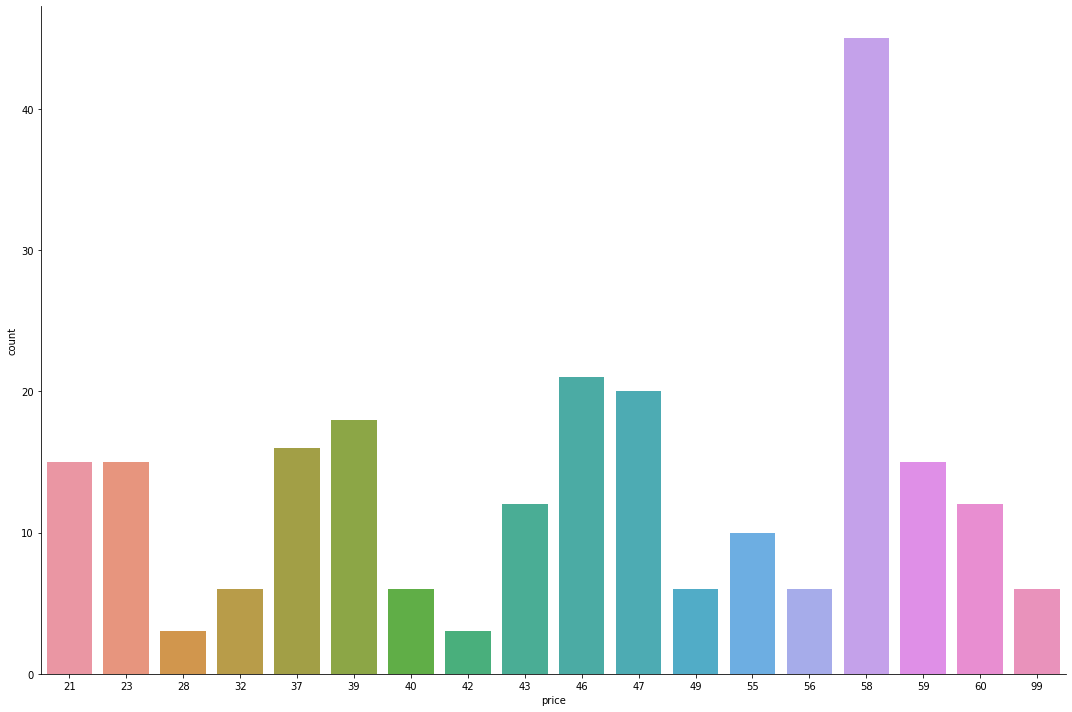

In [ ]:
sn.catplot('price', data=goodtee_df2, kind='count', height=10, aspect=1.5, order=plot_order1)

In [ ]:
# plot_order2 = goodtee_df2.groupby('size')['size'].sum().sort_values(ascending=True).index.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


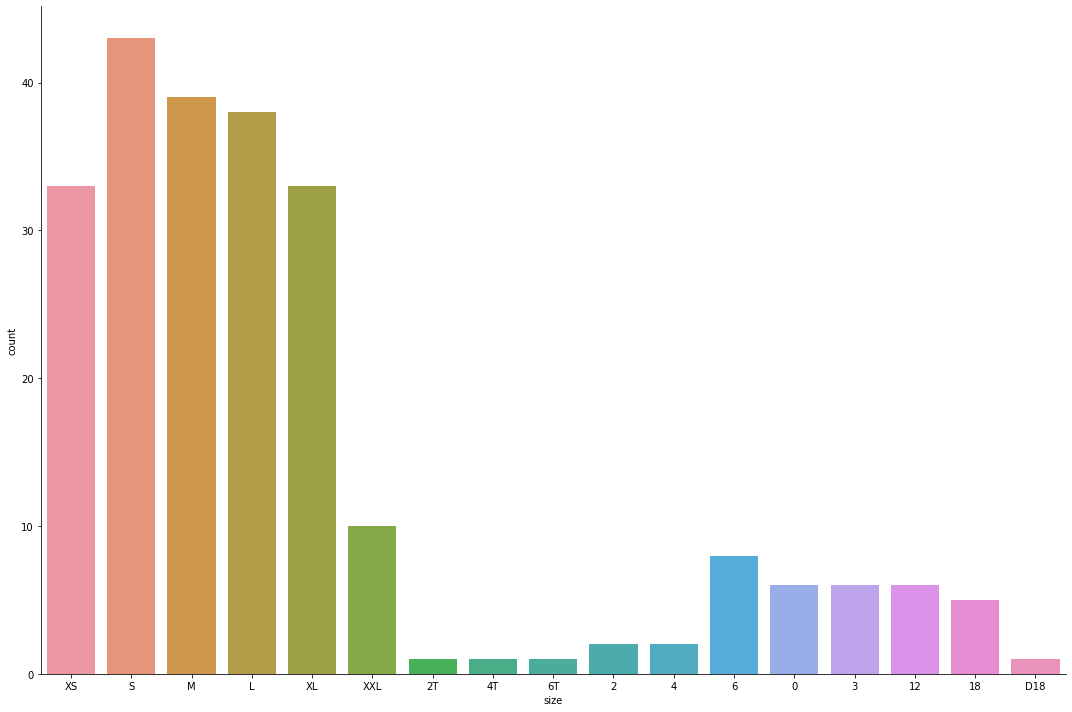

In [ ]:
sn.catplot('size', data=goodtee_df2, kind='count', height=10, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


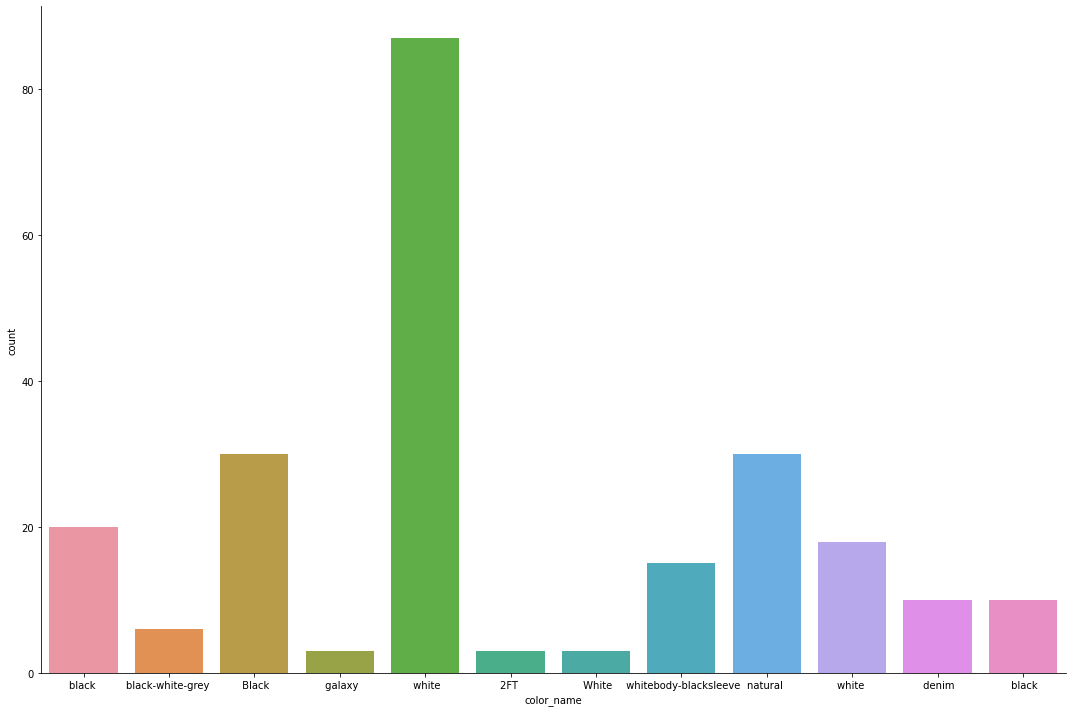

In [ ]:
sn.catplot('color_name', data=goodtee_df2, kind='count', height=10, aspect=1.5)

In [ ]:
## Make this a dict

items

[['3 Pack Fair Scrunchies',
  'purple-pack',
  '3SCR-M-B-L',
  '21',
  'https://www.thegoodtee.com/products/3-pack-scrunchies?variant=32319787040851',
  'Good things come in three’s! Our Fairtrade scrunchies are made from upcycled materials. We used the same soft fabric from our Good t-shirts and utilized fabric from brands that canceled orders after Covid. This is one other way we support our factory. The Fairtrade scrunchie is perfect for your high ponies, messy buns, or just snap it around your wrists for an eco-friendly 90&#39;s touch. Scrunchies are gentler on the hair, causing less damage.Included Colors: Lavender, Mauve, BlackIncluded Colors: Natural Graffiti Print, Red Paisley, BlackIncluded Colors: Blue Butterfly print, Navy, Denim BlueIncluded Colors: Seafoam Green, Black, Green PrintOne-size. Easy to gift. Designed in Canada, Ethically Made in India. Radical Supply Chain Transparency',
  'https://cdn.shopify.com/s/files/1/0039/6915/5121/products/3SCR-M-B-L.jpg?v=1614272819']

In [ ]:
script[1]

'\n'

In [ ]:
script2[0]['url']

'https://www.thegoodtee.com/products/3-pack-scrunchies'

In [ ]:
urls = []

for script in script2:
  urls.append(script['url'])

In [ ]:
urls

['https://www.thegoodtee.com/products/3-pack-scrunchies',
 'https://www.thegoodtee.com/products/gift-card',
 'https://www.thegoodtee.com/products/sustainable-tank-dress',
 'https://www.thegoodtee.com/products/tunic-top',
 'https://www.thegoodtee.com/products/sustainable-pocket-dress',
 'https://www.thegoodtee.com/products/sustainable-t-shirt-pocket-tee',
 'https://www.thegoodtee.com/products/unisex-tee-3-pack',
 'https://www.thegoodtee.com/products/freedom-long-sleeve-tee',
 'https://www.thegoodtee.com/products/organic-cotton-eco-friendly-tie-dye-shirt',
 'https://www.thegoodtee.com/products/organic-cotton-adjustable-sleep-eye-mask',
 'https://www.thegoodtee.com/products/organic-cotton-tunic',
 'https://www.thegoodtee.com/products/sustainable-indigo-natural-dye-kit-tee-unisex',
 'https://www.thegoodtee.com/products/the-sustainable-indigo-dye-kit-good-tee-toddler',
 'https://www.thegoodtee.com/products/the-sustainable-indigo-dye-kit-good-youth-tee',
 'https://www.thegoodtee.com/products

In [ ]:
urls = urls[1:]

In [ ]:
len(urls)

49

In [ ]:
test_url = urls[6]

In [ ]:
urls = []

for item in items.keys():
  url = items[item]['item_url']
  urls.append(url)

In [ ]:
urls

['https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948183765041',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948183961649',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948184158257',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948184354865',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948184551473',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=32378411515987',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948183797809',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948183994417',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948184191025',
 'https://www.thegoodtee.com/products/classic-tshirt-organic-cotton-unisex?variant=15948184387633',


In [ ]:
len(urls)

111

In [ ]:
url = 'https://www.thegoodtee.com/products/organic-cotton-youth-tshirt'

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

response2 = requests.get(url, headers=headers).text

soup2 = BeautifulSoup(response2, 'html.parser')

In [ ]:
soup2

<!DOCTYPE doctype html>

<html class="no-js" lang="en">
<head>
<script>
window.KiwiSizing = window.KiwiSizing === undefined ? {} : window.KiwiSizing;
KiwiSizing.shop = "thegoodtee786.myshopify.com";


KiwiSizing.data = {
  collections: "91520008241",
  tags: "children",
  product: "4413000974419",
  vendor: "The Good Tee",
  type: "T-shirt",
  title: "The Classic Eco-Jersey Youth Tee",
  images: ["\/\/cdn.shopify.com\/s\/files\/1\/0039\/6915\/5121\/products\/IMG_1533_YOSTcmyk.jpg?v=1614278920"],
  options: [{"name":"Size","position":1,"values":["S","M","L"]},{"name":"Color","position":2,"values":["White"]}],
  variants: [{"id":31589918736467,"title":"S \/ White","option1":"S","option2":"White","option3":null,"sku":"YOST-W-S","requires_shipping":true,"taxable":true,"featured_image":{"id":14159049654355,"product_id":4413000974419,"position":1,"created_at":"2020-03-10T19:30:55-04:00","updated_at":"2021-02-25T13:48:40-05:00","alt":"sustainable youth Tshirt","width":2544,"height":3817,"src"

In [ ]:
script3 = soup2.findAll('script', type='application/ld+json')

In [ ]:
script3

[<script type="application/ld+json">
 {
    "@context": "http://schema.org",
    "@type": "WebSite",
    "url": "https://www.thegoodtee.com/",
    "potentialAction": {
      "@type": "SearchAction",
      "target": "https://www.thegoodtee.com/search?q={search_term_string}",
      "query-input": "required name=search_term_string"
    }
 }
 </script>, <script type="application/ld+json">
 {
 	"@context": "http://schema.org",
 	"@type": "Organization",
 	"url": "http://www.thegoodtee.com"}
 </script>, <script type="application/ld+json">
     {
         "@context": "http://schema.org",
         "@type": "BreadcrumbList",
         "itemListElement": [{
             "@type": "ListItem",
             "position": 1,
             "item": {
                 "@type": "Website",
                 "@id": "https://www.thegoodtee.com",
                 "name": " "
             }
         },{
                 "@type": "ListItem",
                 "position": 2,
                 "item": {
               

In [ ]:
script4 = soup2.findAll('p')

In [ ]:
script4[0]

<p>Our gender-neutral short sleeve t-shirt, a tried-and-true classic, is softer than a baby's you-know-what. It has the modern fit of a well-loved favorite, and features reinforced back neck binding for added durability. And the bonus? It’s sustainable, so you can do your part for the planet while chilling in your new favorite go-to tee. Make Mother Nature Proud with this versatile staple that will serve you well for years to come. </p>

In [ ]:
script5 = soup2.findAll('div', class_='collapsible-content__inner rte')

In [ ]:
script5

[<div class="collapsible-content__inner rte">
 <p><b>Good Fabric</b></p>
 <p><span style="font-weight: 400;">✔Certified organic cotton and eco-friendly dyes certified by GOTS  </span></p>
 <p><span style="font-weight: 400;">Global Organic Textile Standard (GOTS) means that’s products meet the gold standard of textile production. It exceeds organic fiber requirements, contains no restricted chemicals and meets strict social responsibility standards.</span></p>
 <p><span style="font-weight: 400;">✔Enzyme and bio washed for incredible softness (eco-friendly of course)</span></p>
 <p><span style="font-weight: 400;">✔Long-staple ring spun yarns mean our fabric is super soft</span></p>
 <p><span style="font-weight: 400;">✔Premium yarns are knit to the highest standards creating durable fabrics that last and resist holes</span></p>
 <p><span style="font-weight: 400;">✔Pre-shrunk and treated to ensure minimal shrinkage</span></p>
 <p><span style="font-weight: 400;">✔Fair Trade certified</span>

In [ ]:
ps = []

for p in script5:
  string = str(p).replace('<p>', '')
  string = string.replace('</p>', '')
  string = string.replace('<b>', '')
  string = string.replace('</b>', '')
  string = string.replace('</span>', '')
  string = string.replace('<span style="font-weight: 400;"', '')
  ps.append(string)
  # print(p)

In [ ]:
ps

['<div class="collapsible-content__inner rte">\nGood Fabric\n>✔Certified organic cotton and eco-friendly dyes certified by GOTS\xa0\xa0\n>Global Organic Textile Standard (GOTS) means that’s products meet the gold standard of textile production. It exceeds organic fiber requirements, contains no restricted chemicals and meets strict social responsibility standards.\n>✔Enzyme and bio washed for incredible softness (eco-friendly of course)\n>✔Long-staple ring spun yarns mean our fabric is super soft\n>✔Premium yarns are knit to the highest standards creating durable fabrics that last and resist holes\n>✔Pre-shrunk and treated to ensure minimal shrinkage\n>✔Fair Trade certified\nGood Care\nWash Cold/Wash Full: >Wash your clothes in cold rather than hot. Wash full loads to save on the amount of energy you use. Switching to an Energy Starmuch as 7,000 gallons of water per year. Use enviro-friendly detergents.\nAir Dry: >Skip the dryer- it uses lots of energy and emits CO2. Instead, air dry o

In [ ]:
elements = []

elements.append(ps[0])
elements.append(ps[2])
elements.append(ps[3])

In [ ]:
elements

['<div class="collapsible-content__inner rte">\nGood Fabric\n>✔Certified organic cotton and eco-friendly dyes certified by GOTS\xa0\xa0\n>Global Organic Textile Standard (GOTS) means that’s products meet the gold standard of textile production. It exceeds organic fiber requirements, contains no restricted chemicals and meets strict social responsibility standards.\n>✔Enzyme and bio washed for incredible softness (eco-friendly of course)\n>✔Long-staple ring spun yarns mean our fabric is super soft\n>✔Premium yarns are knit to the highest standards creating durable fabrics that last and resist holes\n>✔Pre-shrunk and treated to ensure minimal shrinkage\n>✔Fair Trade certified\nGood Care\nWash Cold/Wash Full: >Wash your clothes in cold rather than hot. Wash full loads to save on the amount of energy you use. Switching to an Energy Starmuch as 7,000 gallons of water per year. Use enviro-friendly detergents.\nAir Dry: >Skip the dryer- it uses lots of energy and emits CO2. Instead, air dry o

In [ ]:
## Seeing if all links have the above structure - maybe we'll get lucky

In [ ]:
elements = []

for url in urls:
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

  response2 = requests.get(url, headers=headers).text

  soup2 = BeautifulSoup(response2, 'html.parser')

  script3 = soup2.findAll('div', class_='collapsible-content__inner rte')

  # script4 = soup2.findAll('p')

  ps = []

  for p in script3:
    string = str(p).replace('<p>', '')
    string = string.replace('</p>', '')
    string = string.replace('<b>', '')
    string = string.replace('</b>', '')
    string = string.replace('</span>', '')
    string = string.replace('<span style="font-weight: 400;"', '')
    ps.append(string)

  line = ps[0]
  line = line.split('\n')
  line = line[2]
  line = line.replace('\xa0','')

  elements.append(line)
  # elements.append(ps[0])
  # elements.append(ps[2])
  # elements.append(ps[3])
  # elements.append(ps[4])
  # elements.append(ps[5])
  # elements.append(ps[6])
  # elements.append(ps[7])
  # elements.append(ps[8])


In [ ]:
elements

['>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS',
 '>✔Ce

In [ ]:
len(elements)

111

In [ ]:
line = elements[0]

In [ ]:
line = line.split('\n')

In [ ]:
line = line[2]

In [ ]:
line

'>✔Certified organic cotton and eco-friendly dyes certified by GOTS\xa0\xa0'

In [ ]:
line.replace('\xa0','')

'>✔Certified organic cotton and eco-friendly dyes certified by GOTS'

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

response = requests.get('https://www.zara.com/us/en/pocket-t-shirt-premium-p00977319.html?v1=130384636&v2=1886142', headers=headers).text

soup = BeautifulSoup(response, 'html.parser')

In [ ]:
soup

<!DOCTYPE html>
<html class="web-standard new-front edge-front no-js" data-store="us" dir="ltr" id="product-130378382" lang="en-US"><head><meta charset="utf-8"/><title data-react-helmet="true">POCKET T-SHIRT PREMIUM - Black | ZARA United States</title><meta content="Full cut T-shirt with round neck and short sleeves. Chest patch pocket." data-react-helmet="true" name="description"/><meta content="2021-10-19T00:33:45Z" data-react-helmet="true" http-equiv="last-modified"/><meta content="en-US" data-react-helmet="true" http-equiv="content-language"/><meta content="width=device-width, initial-scale=1.0" data-react-helmet="true" name="viewport"/><meta content="2021-10-19T00:33:45Z" data-react-helmet="true" name="date"/><meta content="POCKET T-SHIRT PREMIUM" data-react-helmet="true" property="og:title"/><meta content="product" data-react-helmet="true" property="og:type"/><meta content="https://static.zara.net/photos///2021/I/0/2/p/0977/319/800/2/w/560/0977319800_1_1_1.jpg?ts=1633521645624" d

# Womens

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

response = requests.get('https://www.thegoodtee.com/collections/women', headers=headers).text

soup = BeautifulSoup(response, 'html.parser')

In [ ]:
soup

<!DOCTYPE doctype html>

<html class="no-js" lang="en">
<head>
<script>
window.KiwiSizing = window.KiwiSizing === undefined ? {} : window.KiwiSizing;
KiwiSizing.shop = "thegoodtee786.myshopify.com";


</script>
<meta content="pbwjzgl82l0vdumdts8c3w3kbpmecf" name="facebook-domain-verification"/>
<!-- Hotjar Tracking Code for https://www.thegoodtee.com/ -->
<script>
    (function(h,o,t,j,a,r){
        h.hj=h.hj||function(){(h.hj.q=h.hj.q||[]).push(arguments)};
        h._hjSettings={hjid:2295537,hjsv:6};
        a=o.getElementsByTagName('head')[0];
        r=o.createElement('script');r.async=1;
        r.src=t+h._hjSettings.hjid+j+h._hjSettings.hjsv;
        a.appendChild(r);
    })(window,document,'https://static.hotjar.com/c/hotjar-','.js?sv=');
</script>
<!-- End of Hotjar Tracking Code for www.thegoodtee.com -->
<meta content="PalRfJD-TmIJak3xqYtqBwxqVCyDkTFR6m_kEx64C4A" name="google-site-verification"/>
<script type="text/javascript">var _0x2192=['origin','utm_source=shopsheriff&utm

In [ ]:
script = soup.findAll('script', type='application/ld+json')[3]

In [ ]:
# script = script.replace('\n' , '')

In [ ]:
script

<script type="application/ld+json">
    [
        {
            "@context" : "http://schema.org",
            "@type": "CollectionPage",
            "name": "Women's Organic Fair Trade Cotton T-Shirts",
            "url": "https://www.thegoodtee.com/collections/women",
            "description": "",
            "image": "https://cdn.shopify.com/s/files/1/0039/6915/5121/collections/MG_7195_copy.jpg?v=1615828530"
        },





        {
            "@context" : "http://schema.org",
            "@type" : "Product",
            "gtin12": "655365073284",
            "productId": "655365073284",
            "url" : "https://www.thegoodtee.com/products/sustainable-tank-dress",
            "name" : "Easy to Love Midi Dress",
            "description" : "Meet your new favorite everyday dress! The 100% organic cotton jersey midi dress mixes relaxed comfort with a rounded hem that flows with you as you move about your day. Crafted with 100% fairtrade organic cotton and eco-friendly dyes, this s

In [ ]:
script = str(script).replace('<script type="application/ld+json">', '')

In [ ]:
script = script.replace('\n' , '')

In [ ]:
script = script.replace(',]</script>', ']')

In [ ]:
script

'    [        {            "@context" : "http://schema.org",            "@type": "CollectionPage",            "name": "Women\'s Organic Fair Trade Cotton T-Shirts",            "url": "https://www.thegoodtee.com/collections/women",            "description": "",            "image": "https://cdn.shopify.com/s/files/1/0039/6915/5121/collections/MG_7195_copy.jpg?v=1615828530"        },        {            "@context" : "http://schema.org",            "@type" : "Product",            "gtin12": "655365073284",            "productId": "655365073284",            "url" : "https://www.thegoodtee.com/products/sustainable-tank-dress",            "name" : "Easy to Love Midi Dress",            "description" : "Meet your new favorite everyday dress! The 100% organic cotton jersey midi dress mixes relaxed comfort with a rounded hem that flows with you as you move about your day. Crafted with 100% fairtrade organic cotton and eco-friendly dyes, this sleeveless tank dress features a flattering v-neck and a

In [ ]:
script2 = json.loads(script)

In [ ]:
script2

[{'@context': 'http://schema.org',
  '@type': 'CollectionPage',
  'description': '',
  'image': 'https://cdn.shopify.com/s/files/1/0039/6915/5121/collections/MG_7195_copy.jpg?v=1615828530',
  'name': "Women's Organic Fair Trade Cotton T-Shirts",
  'url': 'https://www.thegoodtee.com/collections/women'},
 {'@context': 'http://schema.org',
  '@type': 'Product',
  'aggregateRating': {'@type': 'AggregateRating',
   'description': 'Judge.me Reviews',
   'ratingValue': '5.00',
   'reviewCount': '3'},
  'brand': {'name': 'The Good Tee'},
  'description': 'Meet your new favorite everyday dress! The 100% organic cotton jersey midi dress mixes relaxed comfort with a rounded hem that flows with you as you move about your day. Crafted with 100% fairtrade organic cotton and eco-friendly dyes, this sleeveless tank dress features a flattering v-neck and a curved hem. This dress has just the right amount of stretch and softness for comfort, which gives it lots of airy movement.The perfect all day, any 

In [ ]:
script2 = script2[1:]

In [ ]:
script2[2]

{'@context': 'http://schema.org',
 '@type': 'Product',
 'aggregateRating': {'@type': 'AggregateRating',
  'description': 'Judge.me Reviews',
  'ratingValue': '5.00',
  'reviewCount': '1'},
 'brand': {'name': 'The Good Tee'},
 'description': 'Because good things come in threes! Our best-selling unisex sustainable tshirts now come in a set of the essential black, white, and storm grey colors.\xa0 The unisex t-shirt is a closet staple perfect for every occasion, day or night,\xa0 throughout the year.When you build a wardrobe with versatile and practical pieces, the outfit opportunities are endless.\xa0Female model in white and black is wearing a size xs. Height is 5&quot;7, Bust 32&quot;, Waist 24&quot;, Hip 37”\xa0\xa0Female model in storm grey is wearing a size large. height 5”8,\xa0Female model in storm grey is wearing a size large. height 5”8, Bust 38”, Waist 34.5” Hip 44”Male model is wearing a large size. Height 6”0\xa0 Chest 38”, Waist 29”, Hip 35”\xa0Men may prefer to order one si

In [ ]:
items = {}

for item in script2:
  for offer in item['offers']:
    
    size_string = offer['sku'].split('-')
    color_string = offer['name'].split('/')
    color = None

    if len(color_string) == 1:
      color = color_string[0]
    elif len(color_string) == 2:
      if len(color_string[0]) > 3:
        color = color_string[0]
      else:
        color = color_string[1]
    else:
      i = 0
      for ele in color_string:
        if len(ele) > 3:
          color = ele
        i+=1

    items[offer['sku']] = {}

    # print(item['name'])
    # print(type(item['name']))

    items[offer['sku']]['item_name'] = item['name']
    items[offer['sku']]['color_name'] = color
    items[offer['sku']]['size'] = size_string[-1]
    items[offer['sku']]['price'] = offer['price']
    items[offer['sku']]['item_url'] = offer['url']
    items[offer['sku']]['description'] = item['description']
    items[offer['sku']]['image_url'] = item['image']


    # 'color_name' : color_string[0],
    # 'size' : size_string[-1],
    # 'price' : offer['price'],
    # 'item_url' : offer['url'],
    # 'description' : item['description'],
    # 'image_url' : item['image']
    

In [ ]:
items

{'3SCR-D-BP-NV': {'color_name': 'purple-pack',
  'description': 'Good things come in three’s! Our Fairtrade scrunchies are made from upcycled materials. We used the same soft fabric from our Good t-shirts and utilized fabric from brands that canceled orders after Covid. This is one other way we support our factory. The Fairtrade scrunchie is perfect for your high ponies, messy buns, or just snap it around your wrists for an eco-friendly 90&#39;s touch. Scrunchies are gentler on the hair, causing less damage.Included Colors: Lavender, Mauve, BlackIncluded Colors: Natural Graffiti Print, Red Paisley, BlackIncluded Colors: Blue Butterfly print, Navy, Denim BlueIncluded Colors: Seafoam Green, Black, Green PrintOne-size. Easy to gift. Designed in Canada, Ethically Made in India. Radical Supply Chain Transparency',
  'image_url': 'https://cdn.shopify.com/s/files/1/0039/6915/5121/products/3SCR-M-B-L.jpg?v=1605801140',
  'item_name': '3 Pack Fair Scrunchies',
  'item_url': 'https://www.thegood

In [ ]:
goodtee_df = pd.DataFrame.from_dict(items)

In [ ]:
goodtee_df

TNKD21S-R-XS  ...                                       767531503829
item_name                              Easy to Love Midi Dress  ...  [Preorder] Fabric Painting Kit + Sustainable U...
color_name                                         storm-grey   ...                                                 XS
size                                                        XS  ...                                       767531503829
price                                                       98  ...                                                 64
item_url     https://www.thegoodtee.com/products/sustainabl...  ...  https://www.thegoodtee.com/products/sustainabl...
description  Meet your new favorite everyday dress! The 100...  ...  Looking for something fun, creative and guilt-...
image_url    https://cdn.shopify.com/s/files/1/0039/6915/51...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...

[7 rows x 356 columns]

In [ ]:
goodtee_df2_w = goodtee_df.T

In [ ]:
goodtee_df2_w

item_name  ...                                          image_url
TNKD21S-R-XS                            Easy to Love Midi Dress  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
TNKD21S-R-S                             Easy to Love Midi Dress  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
TNKD21S-R-M                             Easy to Love Midi Dress  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
TNKD21S-R-L                             Easy to Love Midi Dress  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
TNKD21S-R-XL                            Easy to Love Midi Dress  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
...                                                         ...  ...                                                ...
759687872164  [Preorder] Fabric Painting Kit + Sustainable U...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
759687872416  [Preorder] Fabric Painting Kit + Sustainable U...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
759687872423  [Preorder] Fabric Painting Kit + Sustainable U...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
759687880756  [Preorder] Fabric Painting Kit + Sustainable U...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
767531503829  [Preorder] Fabric Painting Kit + Sustainable U...  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...

[356 rows x 7 columns]

In [ ]:
goodtee_df2_w.reset_index(inplace=True)

In [ ]:
goodtee_df2_w

index  ...                                          image_url
0    TNKD21S-R-XS  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
1     TNKD21S-R-S  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
2     TNKD21S-R-M  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
3     TNKD21S-R-L  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
4    TNKD21S-R-XL  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
..            ...  ...                                                ...
351  759687872164  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
352  759687872416  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
353  759687872423  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
354  759687880756  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...
355  767531503829  ...  https://cdn.shopify.com/s/files/1/0039/6915/51...

[356 rows x 8 columns]

In [ ]:
goodtee_df2_w['sku'] = goodtee_df2_w['index']

In [ ]:
del goodtee_df2_w['index']

In [ ]:
goodtee_df2_w

item_name  ...           sku
0                              Easy to Love Midi Dress  ...  TNKD21S-R-XS
1                              Easy to Love Midi Dress  ...   TNKD21S-R-S
2                              Easy to Love Midi Dress  ...   TNKD21S-R-M
3                              Easy to Love Midi Dress  ...   TNKD21S-R-L
4                              Easy to Love Midi Dress  ...  TNKD21S-R-XL
..                                                 ...  ...           ...
351  [Preorder] Fabric Painting Kit + Sustainable U...  ...  759687872164
352  [Preorder] Fabric Painting Kit + Sustainable U...  ...  759687872416
353  [Preorder] Fabric Painting Kit + Sustainable U...  ...  759687872423
354  [Preorder] Fabric Painting Kit + Sustainable U...  ...  759687880756
355  [Preorder] Fabric Painting Kit + Sustainable U...  ...  767531503829

[356 rows x 8 columns]

In [ ]:
goodtee_df3 = goodtee_df2_w['item_url'].str.split("/", n=5, expand=True)

In [ ]:
goodtee_df3

0 1   ...         3                                                  4
0    https:     ...  products      sustainable-tank-dress?variant=39340343623763
1    https:     ...  products      sustainable-tank-dress?variant=39340343656531
2    https:     ...  products      sustainable-tank-dress?variant=39340343689299
3    https:     ...  products      sustainable-tank-dress?variant=39340343722067
4    https:     ...  products      sustainable-tank-dress?variant=39340343754835
..      ... ..  ...       ...                                                ...
351  https:     ...  products  sustainable-fabric-painting-kit-unisex-tee?var...
352  https:     ...  products  sustainable-fabric-painting-kit-unisex-tee?var...
353  https:     ...  products  sustainable-fabric-painting-kit-unisex-tee?var...
354  https:     ...  products  sustainable-fabric-painting-kit-unisex-tee?var...
355  https:     ...  products  sustainable-fabric-painting-kit-unisex-tee?var...

[356 rows x 5 columns]

In [ ]:
goodtee_df3['type'] = goodtee_df3[4].str.contains("shirt|tee|t-shirt")

In [ ]:
goodtee_df3

0 1   ...                                                  4   type
0    https:     ...      sustainable-tank-dress?variant=39340343623763  False
1    https:     ...      sustainable-tank-dress?variant=39340343656531  False
2    https:     ...      sustainable-tank-dress?variant=39340343689299  False
3    https:     ...      sustainable-tank-dress?variant=39340343722067  False
4    https:     ...      sustainable-tank-dress?variant=39340343754835  False
..      ... ..  ...                                                ...    ...
351  https:     ...  sustainable-fabric-painting-kit-unisex-tee?var...   True
352  https:     ...  sustainable-fabric-painting-kit-unisex-tee?var...   True
353  https:     ...  sustainable-fabric-painting-kit-unisex-tee?var...   True
354  https:     ...  sustainable-fabric-painting-kit-unisex-tee?var...   True
355  https:     ...  sustainable-fabric-painting-kit-unisex-tee?var...   True

[356 rows x 6 columns]

In [ ]:
goodtee_df3['sex'] = goodtee_df3[4].str.contains("unisex|Unisex")

In [ ]:
goodtee_df3

0 1   ...   type    sex
0    https:     ...  False  False
1    https:     ...  False  False
2    https:     ...  False  False
3    https:     ...  False  False
4    https:     ...  False  False
..      ... ..  ...    ...    ...
351  https:     ...   True   True
352  https:     ...   True   True
353  https:     ...   True   True
354  https:     ...   True   True
355  https:     ...   True   True

[356 rows x 7 columns]

In [ ]:
goodtee_df2_w['shirt'] = goodtee_df3['type']

In [ ]:
goodtee_df2_w['sex'] = goodtee_df3['sex']

In [ ]:
goodtee_df2_w['sex'] = goodtee_df2_w['sex'].map({True: 'unisex', False:'womens'})

In [ ]:
goodtee_df2_w['material'] = elements[0]

In [ ]:
goodtee_df2_w

item_name  ...                                           material
0                              Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
1                              Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
2                              Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
3                              Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
4                              Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
..                                                 ...  ...                                                ...
351  [Preorder] Fabric Painting Kit + Sustainable U...  ...  >✔Certified organic cotton and eco-friendly dy...
352  [Preorder] Fabric Painting Kit + Sustainable U...  ...  >✔Certified organic cotton and eco-friendly dy...
353  [Preorder] Fabric Painting Kit + Sustainable U...  ...  >✔Certified organic cotton and eco-friendly dy...
354  [Preorder] Fabric Painting Kit + Sustainable U...  ...  >✔Certified organic cotton and eco-friendly dy...
355  [Preorder] Fabric Painting Kit + Sustainable U...  ...  >✔Certified organic cotton and eco-friendly dy...

[356 rows x 11 columns]

In [ ]:
goodtee_df2_w = goodtee_df2_w[:-12]

In [ ]:
goodtee_df2_w

item_name  ...                                           material
0        Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
1        Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
2        Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
3        Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
4        Easy to Love Midi Dress  ...  >✔Certified organic cotton and eco-friendly dy...
..                           ...  ...                                                ...
339  [PRE-ORDER] The Fair Hoodie  ...  >✔Certified organic cotton and eco-friendly dy...
340  [PRE-ORDER] The Fair Hoodie  ...  >✔Certified organic cotton and eco-friendly dy...
341  [PRE-ORDER] The Fair Hoodie  ...  >✔Certified organic cotton and eco-friendly dy...
342  [PRE-ORDER] The Fair Hoodie  ...  >✔Certified organic cotton and eco-friendly dy...
343  [PRE-ORDER] The Fair Hoodie  ...  >✔Certified organic cotton and eco-friendly dy...

[344 rows x 11 columns]

In [ ]:
goodtee_df2_w = goodtee_df2_w[(goodtee_df2_w.shirt==True)]

In [ ]:
goodtee_df2_w

item_name  ...                                           material
14   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
15   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
16   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
17   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
18   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
..                                  ...  ...                                                ...
293             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
294             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
295             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
296             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
297             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...

[181 rows x 11 columns]

In [ ]:
final_df = pd.concat([goodtee_df2, goodtee_df2_w], ignore_index=True)

In [ ]:
final_df

item_name  ...                                           material
0    The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
1    The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
2    The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
3    The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
4    The Fave &amp; Fair  Unisex Tee  ...  >✔Certified organic cotton and eco-friendly dy...
..                               ...  ...                                                ...
239          Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
240          Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
241          Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
242          Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
243          Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...

[244 rows x 11 columns]

In [ ]:
final_df.to_csv('thegoodtee2.csv')

In [ ]:
!cp thegoodtee2.csv "drive/My Drive/Drexel/DSCI591/data"

In [ ]:
goodtee_df2_w

item_name  ...                                           material
14   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
15   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
16   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
17   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
18   Fave &amp; Fair Unisex Tee- 3 Pack  ...  >✔Certified organic cotton and eco-friendly dy...
..                                  ...  ...                                                ...
293             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
294             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
295             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
296             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...
297             Freedom Long Sleeve Tee  ...  >✔Certified organic cotton and eco-friendly dy...

[181 rows x 11 columns]

In [ ]:
for item in goodtee_df2['item_name']:
  print(item)

In [ ]:
plot_order1 = goodtee_df2_w.groupby('price')['price'].sum().sort_values(ascending=True).index.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


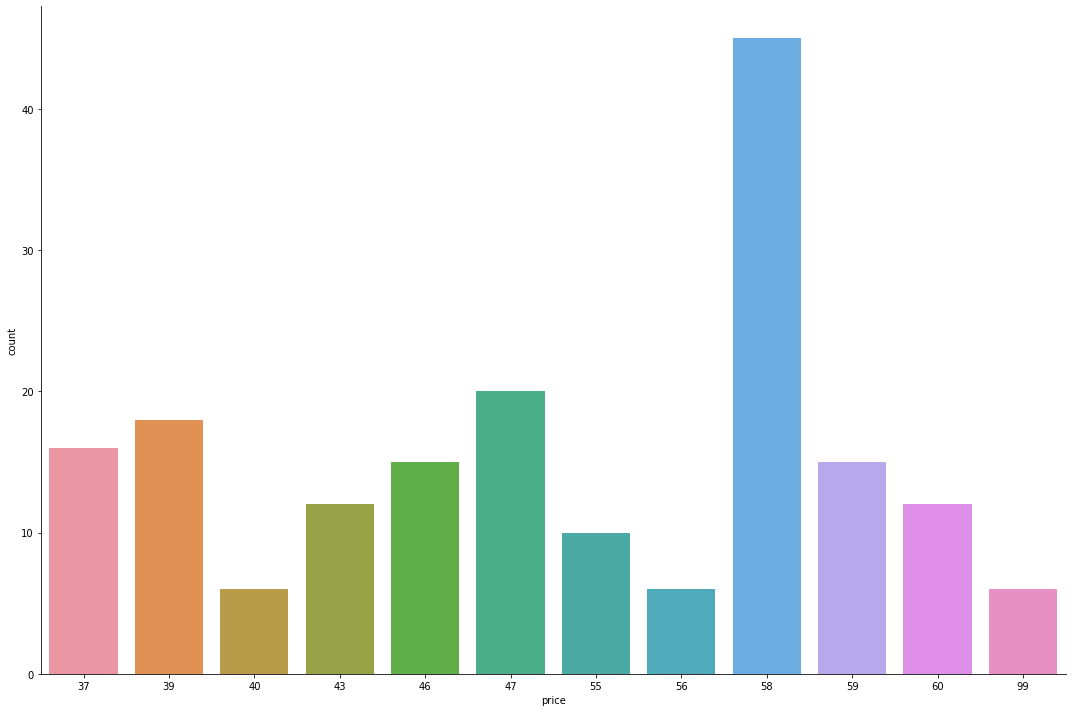

In [ ]:
sn.catplot('price', data=goodtee_df2_w, kind='count', height=10, aspect=1.5, order=plot_order1)

In [ ]:
# plot_order2 = goodtee_df2.groupby('size')['size'].sum().sort_values(ascending=True).index.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


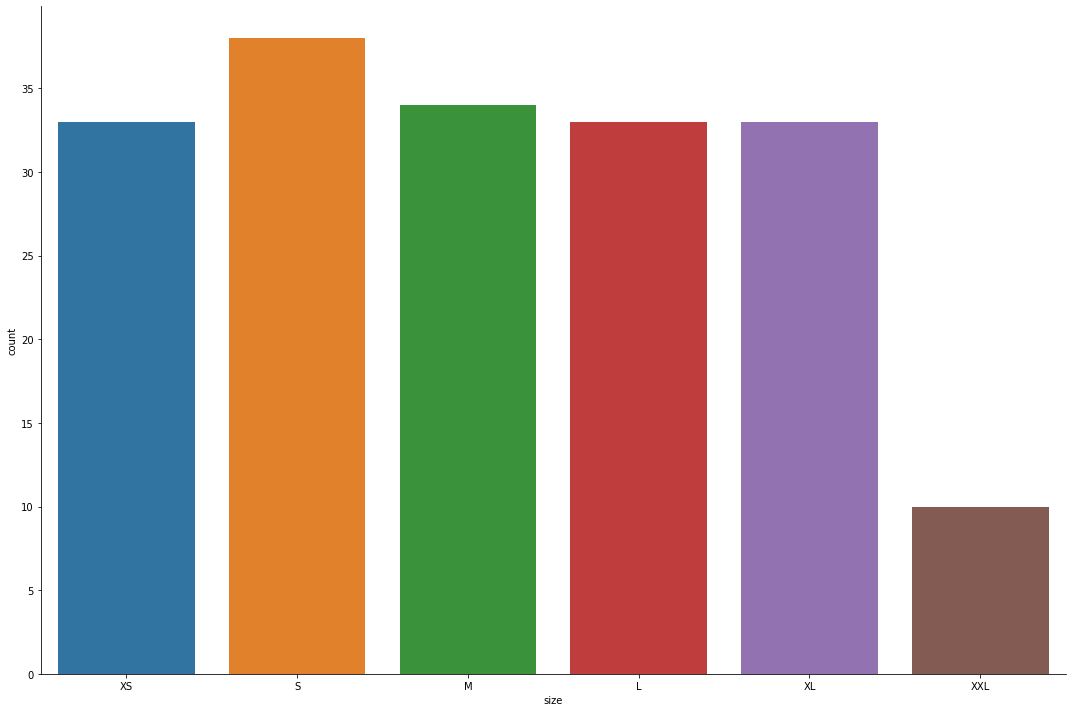

In [ ]:
sn.catplot('size', data=goodtee_df2_w, kind='count', height=10, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


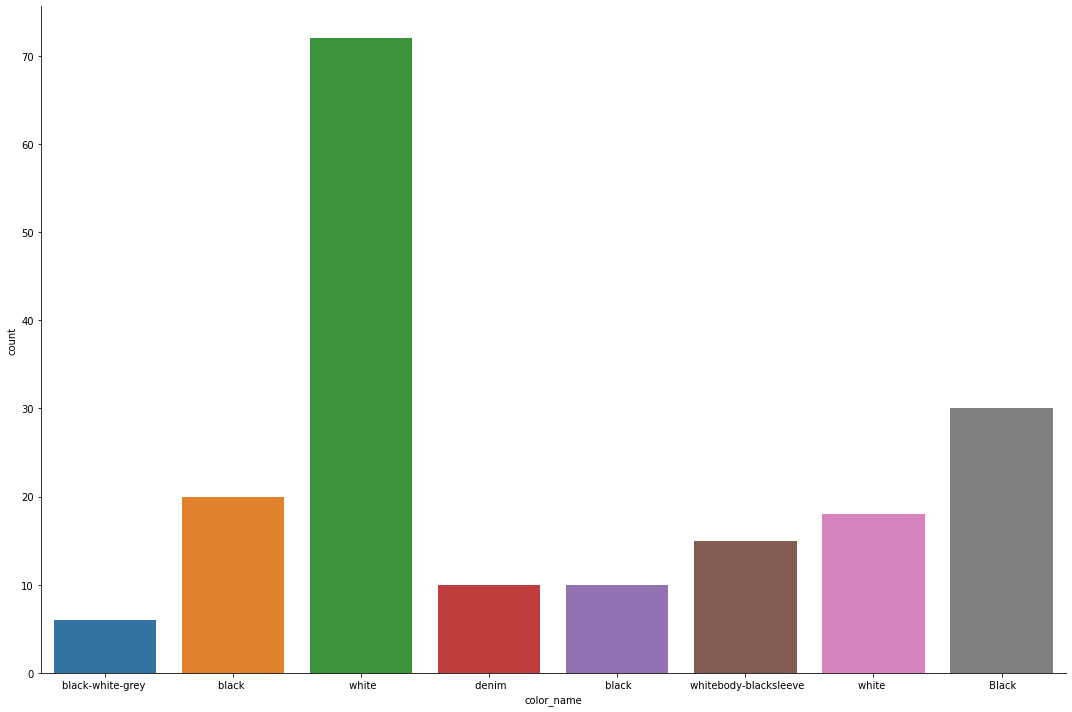

In [ ]:
sn.catplot('color_name', data=goodtee_df2_w, kind='count', height=10, aspect=1.5)